# Amazon Fine Food Reviews

**Data Description**

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

**Data includes:**
* Reviews from Oct 1999 - Oct 2012 - 568,454 reviews
* 256,059 Users and 74,258 products
* 260 users with > 50 reviews

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

We had ~500000 .txt files containing reviews from various customers on Amazon. For simplicity and analysis, we converted those files into one single txt file which is comma seperated file. 
Load the csv file as pandas dataframe

In [2]:
df = pd.read_csv("Allreviews.txt", encoding="iso-8859-1")
df.head(10)

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned ...
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0.0,0.0,5.0,1.351210e+09,Healthy Dog Food,This is a very healthy dog food. Good for the...
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0.0,1.0,1.0,1.331165e+09,Bad,I fed this to my Golden Retriever and he hate...
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2.0,5.0,2.0,1.332374e+09,"Not hot, not habanero","I have to admit, I was a sucker for the large..."
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0.0,1.0,4.0,1.337472e+09,The best weve tried so far,We have a 7 week old... He had gas and consti...
5,B000LQORDE,A19W47CXJJP1MI,Amazonian Consumer,2.0,5.0,5.0,1.235088e+09,"This spicy noodle cures my cold, upset stomac...",I love this noodle and have it once or twice ...
6,B000LQORDE,A13LMI7F7UC2VO,Super Villain,6.0,12.0,3.0,1.251245e+09,I'm spicyyyyyyyyyy,That's pretty much what these ramen noodles h...
7,B000LQORDE,A29WRXXYKLFTG,zhenzhen,0.0,2.0,5.0,1.320538e+09,I like it,The taste is great! especially when you cook ...
8,B000LQORDE,A2LKCOIVLZWDG5,TopQuark,0.0,2.0,5.0,1.320538e+09,The best instant noodle!,This is the best instant noodle I have tried....
9,B000LQORDE,A1GPN9X27K5WN,"Chase A Byrd ""byrd720""",0.0,2.0,5.0,1.319933e+09,Awesome!,I don't see how anyone could say anything bad...


## Basic Preprocessing

In [3]:
# Helpfulness (fraction of users who found the review helpful) = HelpfulnessNumerator / HelpfulnessDenominator
# Adding column for Helpfullness

df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']

In [4]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned ...,1.0
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0.0,0.0,5.0,1.351210e+09,Healthy Dog Food,This is a very healthy dog food. Good for the...,NaN
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0.0,1.0,1.0,1.331165e+09,Bad,I fed this to my Golden Retriever and he hate...,0.0
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2.0,5.0,2.0,1.332374e+09,"Not hot, not habanero","I have to admit, I was a sucker for the large...",0.4
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0.0,1.0,4.0,1.337472e+09,The best weve tried so far,We have a 7 week old... He had gas and consti...,0.0


In [5]:
df.isnull().sum()

ProductId                      0
UserId                         0
ProfileName                    0
HelpfulnessNumerator          15
HelpfulnessDenominator        15
Score                         15
Time                          15
ReviewSummary                 15
ReviewText                    15
Helpfulness               270057
dtype: int64

* As we can see, New column  contains more than 270000 nan values which occured by dividing zero by zero or division of nan and zero value
* First we will replace those nan values with zero

In [6]:
df['Helpfulness'].fillna(0, inplace=True)
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned ...,1.0
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0.0,0.0,5.0,1.351210e+09,Healthy Dog Food,This is a very healthy dog food. Good for the...,0.0
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0.0,1.0,1.0,1.331165e+09,Bad,I fed this to my Golden Retriever and he hate...,0.0
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2.0,5.0,2.0,1.332374e+09,"Not hot, not habanero","I have to admit, I was a sucker for the large...",0.4
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0.0,1.0,4.0,1.337472e+09,The best weve tried so far,We have a 7 week old... He had gas and consti...,0.0


We still have some of null values, as there is plenty of data in hand we can delete few rows containing null values

In [7]:
print("Shape of dataframe before deleting null values :", df.shape)
df.dropna(inplace=True)
print("Shape of dataframe after deleting null values :", df.shape)

Shape of dataframe before deleting null values : (568454, 10)
Shape of dataframe after deleting null values : (568438, 10)


In [8]:
# Count number of reviews where score is 3
print("no. of reviews with score other than 3 :", len(df[df['Score']!=3]))
print("no. of reviews with score 3 :", len(df[df['Score']==3]))
print("difference in both numbers mentioned above :", len(df[df['Score']!=3]) - len(df[df['Score']==3]) )

no. of reviews with score other than 3 : 525799
no. of reviews with score 3 : 42639
difference in both numbers mentioned above : 483160


In [9]:
# Check whether our data has duplicates or not
df.duplicated(subset ={"UserId","ProfileName","Time","ReviewText"}, keep='last').sum()

174868

In [10]:
df.shape

(568438, 10)

In [11]:
df.drop_duplicates(subset={"UserId","ProfileName","Time","ReviewText"}, keep = 'last', inplace= True)
df.shape

(393570, 10)

## Exploratory Data Analysis

### Distribution of Ratings

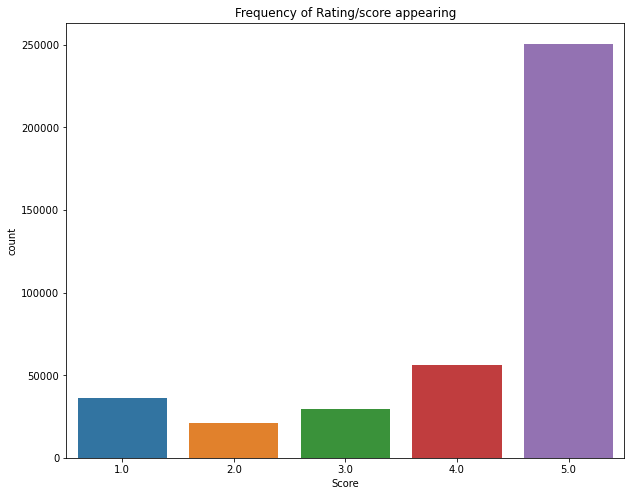

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(x =df['Score'])
plt.title("Frequency of Rating/score appearing")
plt.show()

* Maximum number of reviews are having rating score = 5, We will consider 4 and 5 star ratings as positive and rest will be negative

In [13]:
# Positive = 1, Negative = 0
df['Review_type'] = df['Score'].apply(lambda x : 1 if x>3 else 0)

### Distribution of Helpfullness

In [14]:
df['Helpfulness'].dtype

dtype('float64')

In [15]:
# converting helpfilness values to percent categories showing how much the review was helfil
def help_group(x):
    if (0.0< x < 0.25):
        return "less than 25%"
    elif ( 0.25 <= x <= 0.75):
        return "between 25% to 75%"
    elif (x > 0.75):
        return "more than 75%"
    else:
        return "not voted"

In [16]:
df['%Helpful'] =df['Helpfulness'].apply(help_group)

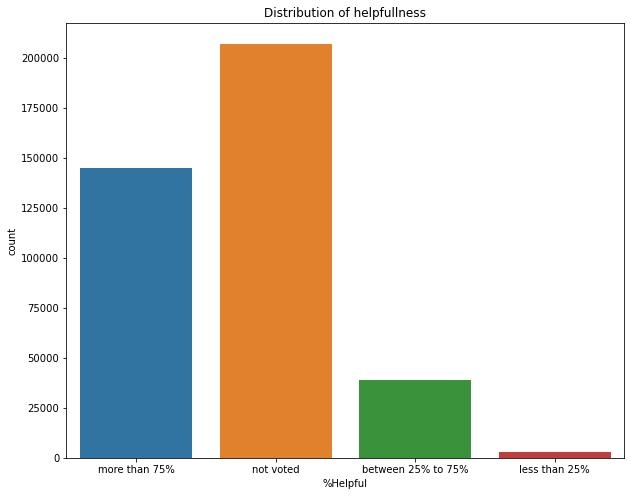

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['%Helpful'])
plt.title("Distribution of helpfullness")
plt.show()

In [18]:
df['%Helpful'].value_counts(normalize=True)

not voted             0.526293
more than 75%         0.367767
between 25% to 75%    0.098341
less than 25%         0.007600
Name: %Helpful, dtype: float64

* 52% reviews are not helpful at all as they were not voted by any individual
* 36% reviews are most helpful followed by group of "25 to 75 percent" of helpfulness
* very few almost 0.01 % reviews are voted helpful in group of 25% group

### How does rating affect Helpfulness?

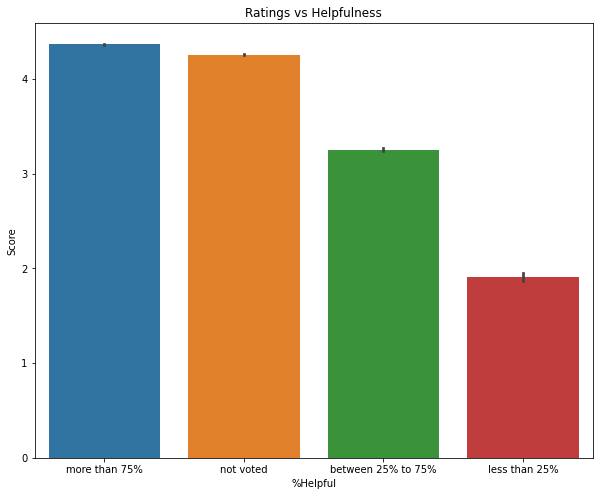

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['%Helpful'],y=df['Score'])
plt.title("Ratings vs Helpfulness")
plt.show()

* helpfulness increases as ratings increases which is quite obvious
* less helpful reviews are not rated more than 2

### How does word count vary by rating?

In [20]:
df['word_count'] = df['ReviewText'].apply(lambda x:len(str(x).split(" ")))

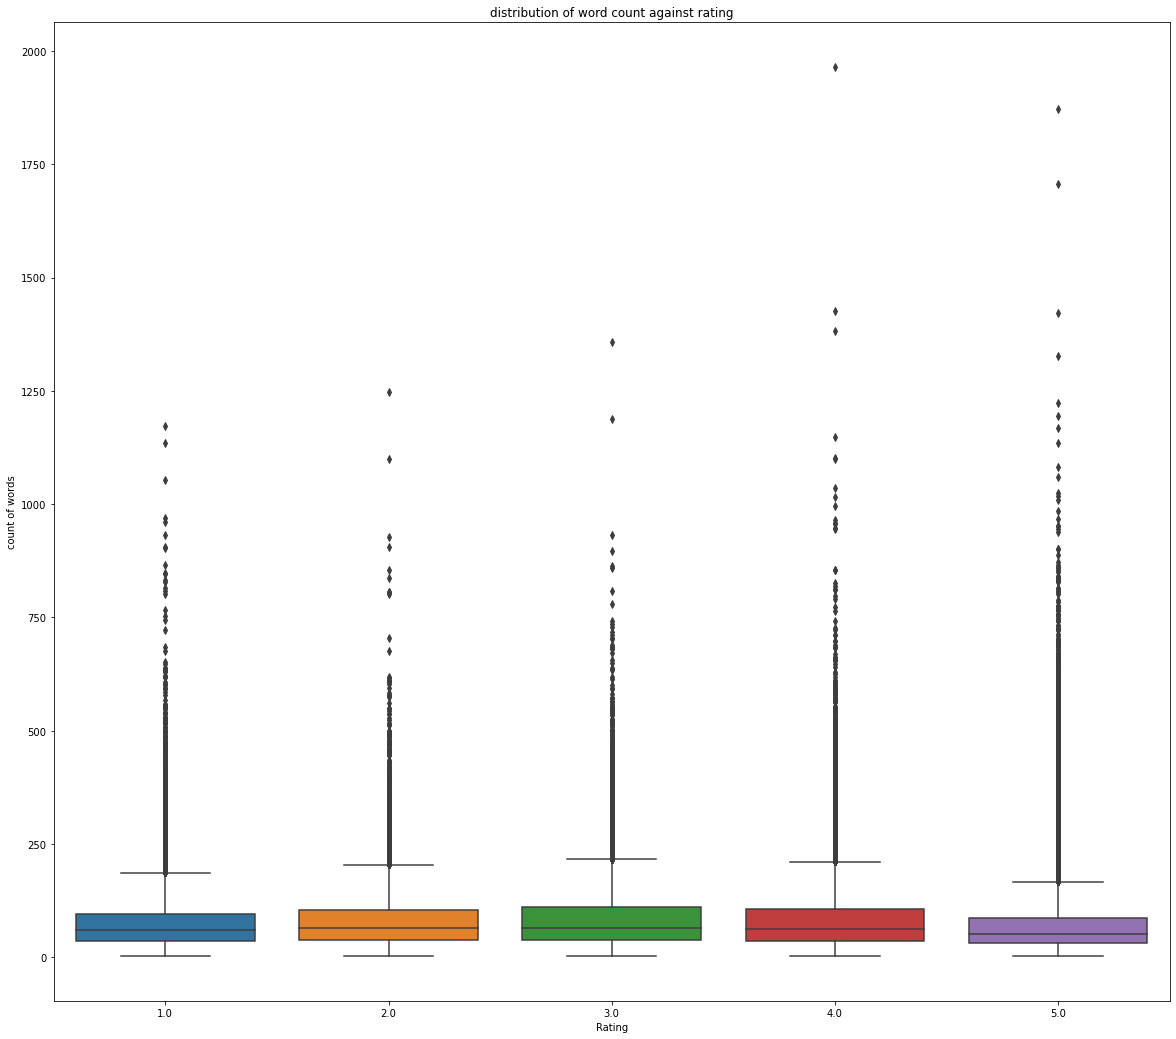

In [21]:
plt.figure(figsize=(20,18))
sns.boxplot(x=df['Score'], y=df['word_count'])
plt.title("distribution of word count against rating")
plt.xlabel("Rating")
plt.ylabel("count of words")
plt.show()

* Median word count for 5 star rating is less than any other rating's median word count
* All the ratings have lot of outliers in word count

In [22]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness,Review_type,%Helpful,word_count
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned ...,1.0,1,more than 75%,50
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0.0,0.0,5.0,1.351210e+09,Healthy Dog Food,This is a very healthy dog food. Good for the...,0.0,1,not voted,26
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0.0,1.0,1.0,1.331165e+09,Bad,I fed this to my Golden Retriever and he hate...,0.0,0,not voted,39
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2.0,5.0,2.0,1.332374e+09,"Not hot, not habanero","I have to admit, I was a sucker for the large...",0.4,0,between 25% to 75%,72
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0.0,1.0,4.0,1.337472e+09,The best weve tried so far,We have a 7 week old... He had gas and consti...,0.0,1,not voted,199


In [24]:
df.to_csv("ReviewsNew.csv",index=False)